#Import Predefied Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz
import os

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# Load the dataset
data = pd.read_csv('/content/heart.csv')

In [5]:
# Data Preprocessing
# Check for missing values
print("Missing values:\n")
data.isnull().sum()

Missing values:



,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
# Define features and target
X = data.drop('target', axis=1)
y = data['target']

In [8]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [9]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Train a Decision Tree Classifier

In [12]:
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [13]:
# Predict and evaluate
dt_predictions = dt_classifier.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("\nDecision Tree Accuracy:", dt_accuracy)
print("\nDecision Tree Classification Report:\n", classification_report(y_test, dt_predictions))


Decision Tree Accuracy: 0.8439024390243902

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.74      0.82       102
           1       0.78      0.95      0.86       103

    accuracy                           0.84       205
   macro avg       0.86      0.84      0.84       205
weighted avg       0.86      0.84      0.84       205



# 2. Visualize the Decision Tree

In [14]:
dot_data = export_graphviz(dt_classifier,
                          feature_names=X.columns,
                          class_names=['No Heart Disease', 'Heart Disease'],
                          filled=True, rounded=True,
                          special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format='png', cleanup=True)

'decision_tree.png'

# 3. Analyze Overfitting by varying tree depth

In [15]:
depths = range(1, 21)
train_scores = []
test_scores = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train_scaled, y_train)
    train_scores.append(accuracy_score(y_train, dt.predict(X_train_scaled)))
    test_scores.append(accuracy_score(y_test, dt.predict(X_test_scaled)))

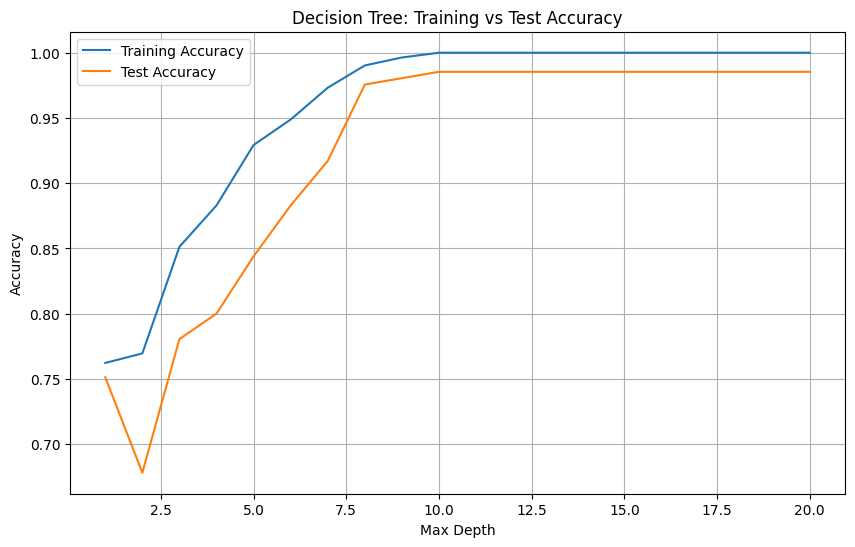

In [17]:
# Plot train vs test accuracy to analyze overfitting
plt.figure(figsize=(10, 6))
plt.plot(depths, train_scores, label='Training Accuracy')
plt.plot(depths, test_scores, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Training vs Test Accuracy')
plt.legend()
plt.grid(True)
plt.savefig('overfitting_analysis.png')
plt.show()

# 4. Train a Random Forest Classifier

In [18]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Predict and evaluate
rf_predictions = rf_classifier.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.9853658536585366

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



# 5. Feature Importance

In [20]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

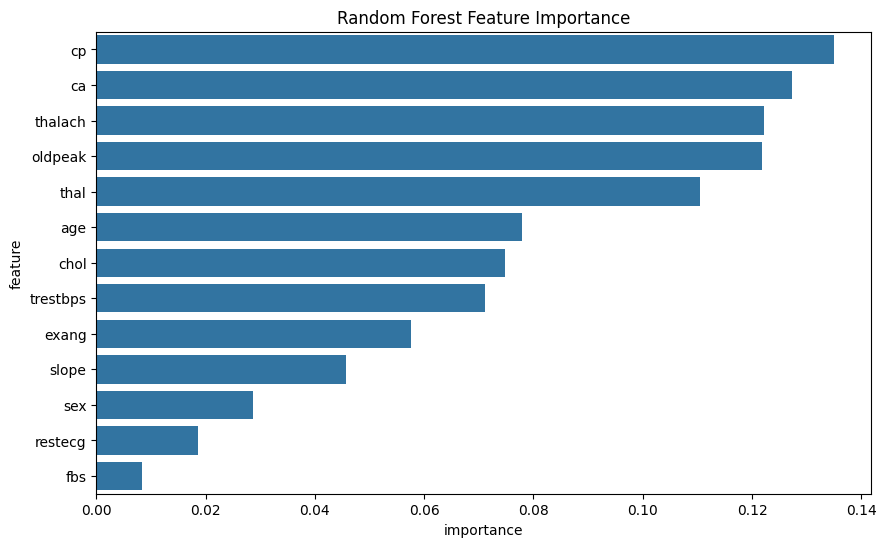

In [21]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.savefig('feature_importance.png')
plt.show()

# 6. Cross-Validation

In [22]:
dt_cv_scores = cross_val_score(dt_classifier, X_train_scaled, y_train, cv=5)
rf_cv_scores = cross_val_score(rf_classifier, X_train_scaled, y_train, cv=5)

print("\nDecision Tree Cross-Validation Scores:", dt_cv_scores)
print("Decision Tree CV Mean:", dt_cv_scores.mean(), "±", dt_cv_scores.std())
print("\nRandom Forest Cross-Validation Scores:", rf_cv_scores)
print("Random Forest CV Mean:", rf_cv_scores.mean(), "±", rf_cv_scores.std())


Decision Tree Cross-Validation Scores: [0.90853659 0.87804878 0.89634146 0.90853659 0.84146341]
Decision Tree CV Mean: 0.8865853658536587 ± 0.025170448098232087

Random Forest Cross-Validation Scores: [0.99390244 0.9695122  1.         0.98780488 0.95731707]
Random Forest CV Mean: 0.9817073170731707 ± 0.015900493671225986


In [23]:
# Save results to a text file
with open('results.txt', 'w') as f:
    f.write("Decision Tree Accuracy: {}\n".format(dt_accuracy))
    f.write("\nDecision Tree Classification Report:\n{}\n".format(classification_report(y_test, dt_predictions)))
    f.write("\nRandom Forest Accuracy: {}\n".format(rf_accuracy))
    f.write("\nRandom Forest Classification Report:\n{}\n".format(classification_report(y_test, rf_predictions)))
    f.write("\nDecision Tree Cross-Validation Scores: {}\n".format(dt_cv_scores))
    f.write("Decision Tree CV Mean: {} ± {}\n".format(dt_cv_scores.mean(), dt_cv_scores.std()))
    f.write("\nRandom Forest Cross-Validation Scores: {}\n".format(rf_cv_scores))
    f.write("Random Forest CV Mean: {} ± {}\n".format(rf_cv_scores.mean(), rf_cv_scores.std()))